In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import seaborn as sborn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.regression.linear_model import OLS
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
master_df=pd.read_csv('/Users/andreewerner/Desktop/mlb-master_df-data.csv')

In [3]:
#shape is 42728 x 28
master_df.shape

(42728, 28)

In [4]:
# check if any null values 
master_df.isnull().sum()

date                       0
team_x                     0
opponent                   0
rank                       0
gb                         0
time                       0
attendance                 0
streak                     0
double_header              0
runs_per_game              0
runs_moving_avg            0
runs_allowed_moving_avg    0
win_pct                    0
opening_day                0
wins_and_losses            0
win_percentage             0
day_game                   0
day                        0
weekday                    0
weekday_name               0
month                      0
year                       0
stadium                    0
capacity                   0
bat_age                    0
pitch_age                  0
top_player_stat            0
division_game              0
dtype: int64

In [5]:
# datatypes are familiar
master_df.dtypes

date                        object
team_x                      object
opponent                    object
rank                         int64
gb                         float64
time                        object
attendance                   int64
streak                       int64
double_header                int64
runs_per_game              float64
runs_moving_avg            float64
runs_allowed_moving_avg    float64
win_pct                    float64
opening_day                  int64
wins_and_losses              int64
win_percentage             float64
day_game                     int64
day                          int64
weekday                      int64
weekday_name                object
month                        int64
year                         int64
stadium                     object
capacity                     int64
bat_age                    float64
pitch_age                  float64
top_player_stat            float64
division_game                int64
dtype: object

In [7]:
master_df.head(10)

,date,team_x,opponent,rank,gb,time,attendance,streak,double_header,runs_per_game,...,weekday,weekday_name,month,year,stadium,capacity,bat_age,pitch_age,top_player_stat,division_game
0,2000-04-03,ANA,NYY,0,0.0,0 days 03:02:00.000000000,42704,0,0,0.000000,...,0,Monday,4,2000,Angel Stadium,45050,27.6,28.9,8.3,0
1,2000-04-04,ANA,NYY,3,-1.0,0 days 03:20:00.000000000,25818,-1,0,2.000000,...,1,Tuesday,4,2000,Angel Stadium,45050,27.6,28.9,8.3,0
2,2000-04-05,ANA,NYY,4,-2.0,0 days 03:01:00.000000000,24560,-2,0,2.500000,...,2,Wednesday,4,2000,Angel Stadium,45050,27.6,28.9,8.3,0
3,2000-08-11,ANA,NYY,3,-8.5,0 days 03:01:00.000000000,43169,-1,0,5.269565,...,4,Friday,8,2000,Angel Stadium,45050,27.6,28.9,8.3,0
4,2000-08-12,ANA,NYY,3,-9.0,0 days 03:18:00.000000000,43394,1,0,5.293103,...,5,Saturday,8,2000,Angel Stadium,45050,27.6,28.9,8.3,0
5,2000-08-13,ANA,NYY,3,-8.0,0 days 03:10:00.000000000,43411,2,0,5.324786,...,6,Sunday,8,2000,Angel Stadium,45050,27.6,28.9,8.3,0
6,2000-06-02,ATL,NYY,1,6.5,0 days 03:08:00.000000000,48524,-1,0,5.269231,...,4,Friday,6,2000,Turner Field,49586,30.8,31.4,8.2,0
7,2000-06-03,ATL,NYY,1,5.5,0 days 03:57:00.000000000,48423,-2,0,5.207547,...,5,Saturday,6,2000,Turner Field,49586,30.8,31.4,8.2,0
8,2000-06-04,ATL,NYY,1,5.5,0 days 03:07:00.000000000,47756,1,0,5.314815,...,6,Sunday,6,2000,Turner Field,49586,30.8,31.4,8.2,0
9,2000-07-24,BAL,NYY,4,-10.0,0 days 03:14:00.000000000,47450,-1,0,5.175258,...,0,Monday,7,2000,Oriole Park,48876,32.2,29.1,5.6,1


In [118]:
#convert date column to datetime and drop some columns
master_df['date']=pd.to_datetime(master_df['date'])
master_df.drop(['date','time','weekday'],axis=1,inplace=True)

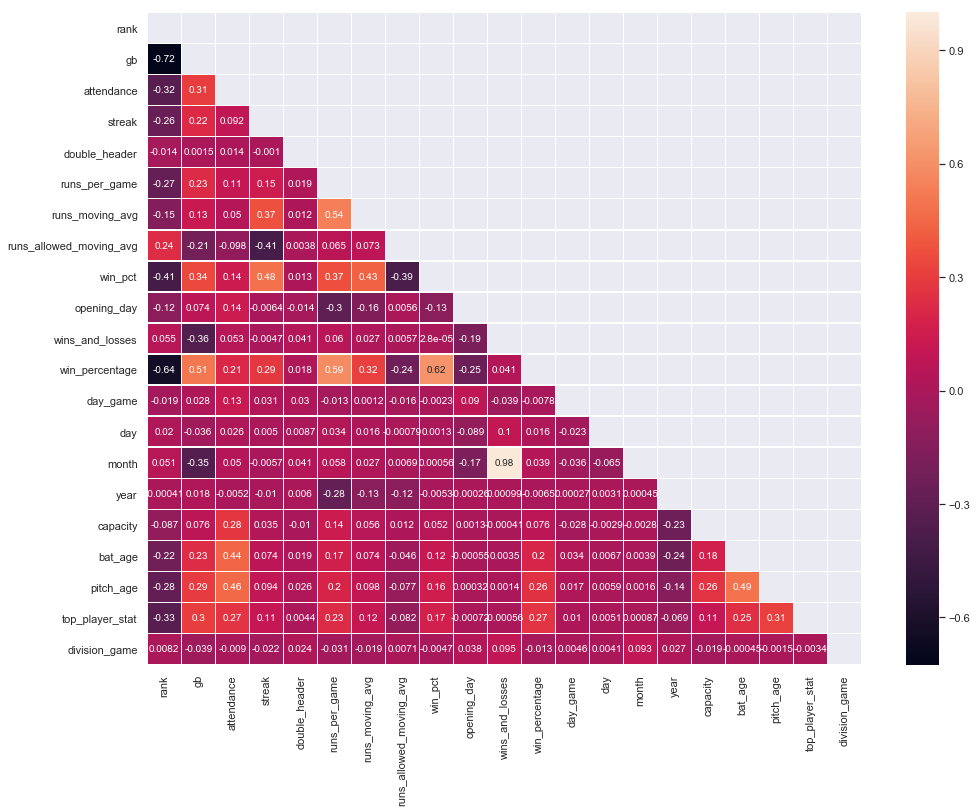

In [119]:
#plot initial correlation heatmap with all 24 features 
fig = plt.gcf()
fig.set_size_inches(16 , 12)
master_df_corr=master_df.corr()

mask = np.zeros_like(master_df_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(master_df_corr, linewidth = 0.5, mask=mask, annot=True, annot_kws={'size': 10})

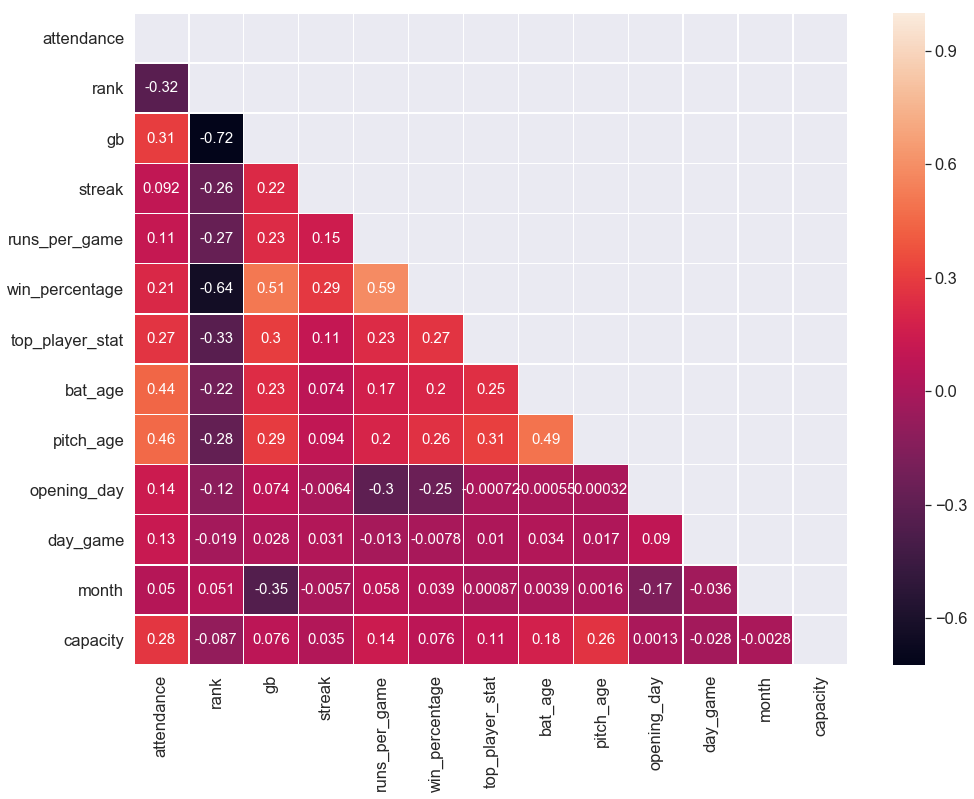

In [120]:
#drop features with very low correlations 
master_df.drop(['double_header','runs_moving_avg','runs_allowed_moving_avg','win_pct','wins_and_losses','day','year','division_game'],axis=1,inplace=True)


#reorder how columns appear in dataframe
columnsTitles = ['attendance','rank','gb','streak','runs_per_game','win_percentage','top_player_stat','bat_age','pitch_age','opening_day','day_game','month','capacity', 'team_x','opponent','stadium', 'weekday_name']
master_df=master_df.reindex(columns=columnsTitles)

# look at correlation heat map for smaller feature set

fig = plt.gcf()
fig.set_size_inches(16 , 12)
sborn.set(font_scale=1.5)
master_df_corr=master_df.corr()

mask = np.zeros_like(master_df_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(master_df_corr, linewidth = 0.5, mask=mask, annot=True, annot_kws={'size': 15})

In [121]:
# pairplot visualizes another way 
#sns.pairplot(master_df)

In [122]:
# yet another correlation matrix view with 13 features
master_df_corr

,attendance,rank,gb,streak,runs_per_game,win_percentage,top_player_stat,bat_age,pitch_age,opening_day,day_game,month,capacity
attendance,1.000000,-0.324517,0.305609,0.092258,0.111321,0.214877,0.268360,0.443717,0.457258,0.141498,0.125475,0.049978,0.277310
rank,-0.324517,1.000000,-0.724828,-0.257197,-0.272849,-0.641278,-0.332047,-0.220355,-0.282942,-0.119569,-0.018660,0.050932,-0.086948
gb,0.305609,-0.724828,1.000000,0.221428,0.225587,0.512176,0.301796,0.232995,0.292645,0.074384,0.028134,-0.351277,0.076327
streak,0.092258,-0.257197,0.221428,1.000000,0.149123,0.285423,0.106804,0.073821,0.094048,-0.006399,0.030776,-0.005735,0.034654
runs_per_game,0.111321,-0.272849,0.225587,0.149123,1.000000,0.586095,0.230644,0.170406,0.195667,-0.301347,-0.013331,0.058202,0.137854
win_percentage,0.214877,-0.641278,0.512176,0.285423,0.586095,1.000000,0.267950,0.199153,0.258272,-0.250026,-0.007842,0.038872,0.075727
top_player_stat,0.268360,-0.332047,0.301796,0.106804,0.230644,0.267950,1.000000,0.245416,0.309094,-0.000719,0.010174,0.000871,0.110543
bat_age,0.443717,-0.220355,0.232995,0.073821,0.170406,0.199153,0.245416,1.000000,0.488686,-0.000553,0.033967,0.003939,0.177860
pitch_age,0.457258,-0.282942,0.292645,0.094048,0.195667,0.258272,0.309094,0.488686,1.000000,0.000323,0.016679,0.001641,0.259264
opening_day,0.141498,-0.119569,0.074384,-0.006399,-0.301347,-0.250026,-0.000719,-0.000553,0.000323,1.000000,0.090308,-0.173499,0.001288


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


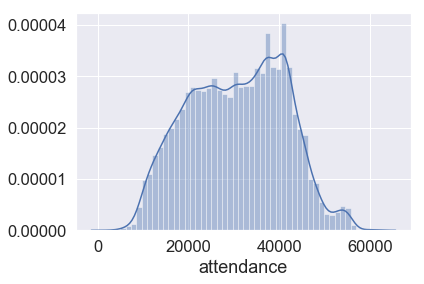

In [123]:
# histogram of target is pretty normal looking
sns.distplot(master_df['attendance'])
# tprint(normaltest(master_df['attendance']))

In [8]:
# label non-numeric columns
label = preprocessing.LabelEncoder()

master_df['team_label'] = label.fit_transform(master_df['team_x'])
master_df['opponent_label'] = label.fit_transform(master_df['opponent'])
master_df['stadium_label'] = label.fit_transform(master_df['stadium'])
master_df['weekday_name_label']=label.fit_transform(master_df['weekday_name'])

#reorder how columns appear in dataframe
columnsTitles = ['attendance', 'team_label', 'opponent_label','stadium_label','rank','gb','streak','runs_per_game','win_percentage','top_player_stat','bat_age','pitch_age','opening_day','day_game','month','capacity']
master_df.reindex(columns=columnsTitles)
# # drop old columns and define feature matrix and target column 
X=master_df.drop(['team_x','opponent','stadium','weekday_name','attendance'],axis=1)
y=master_df['attendance']


# #hold out a test set on 20% of data for testing at the very end
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

# #split X into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3) 

X.head()

,date,rank,gb,time,streak,double_header,runs_per_game,runs_moving_avg,runs_allowed_moving_avg,win_pct,...,year,capacity,bat_age,pitch_age,top_player_stat,division_game,team_label,opponent_label,stadium_label,weekday_name_label
27128,2016-05-18,4,-5.5,0 days 03:12:00.000000000,-1,0,3.846154,5.4,4.8,0.4,...,2016,45483,28.5,28.4,10.5,0,14,15,1,6
12791,2006-07-09,2,-12.0,0 days 02:58:00.000000000,1,0,4.790698,4.0,4.2,0.3,...,2006,43308,29.3,30.5,7.3,0,22,23,7,3
22918,2013-08-27,1,9.5,0 days 03:26:00.000000000,1,0,4.045802,3.4,2.8,0.6,...,2013,56000,30.6,28.1,8.5,0,15,5,9,5
23413,2014-07-08,1,4.0,0 days 03:29:00.000000000,-3,0,4.635294,5.0,4.8,0.4,...,2014,41681,29.8,28.5,5.8,0,10,15,34,5
37988,2010-08-04,3,-7.0,0 days 02:51:00.000000000,1,0,4.386792,4.4,5.4,0.3,...,2010,41255,29.0,26.5,6.5,1,10,6,34,6


In [125]:
master_df_corr

,attendance,rank,gb,streak,runs_per_game,win_percentage,top_player_stat,bat_age,pitch_age,opening_day,day_game,month,capacity
attendance,1.000000,-0.324517,0.305609,0.092258,0.111321,0.214877,0.268360,0.443717,0.457258,0.141498,0.125475,0.049978,0.277310
rank,-0.324517,1.000000,-0.724828,-0.257197,-0.272849,-0.641278,-0.332047,-0.220355,-0.282942,-0.119569,-0.018660,0.050932,-0.086948
gb,0.305609,-0.724828,1.000000,0.221428,0.225587,0.512176,0.301796,0.232995,0.292645,0.074384,0.028134,-0.351277,0.076327
streak,0.092258,-0.257197,0.221428,1.000000,0.149123,0.285423,0.106804,0.073821,0.094048,-0.006399,0.030776,-0.005735,0.034654
runs_per_game,0.111321,-0.272849,0.225587,0.149123,1.000000,0.586095,0.230644,0.170406,0.195667,-0.301347,-0.013331,0.058202,0.137854
win_percentage,0.214877,-0.641278,0.512176,0.285423,0.586095,1.000000,0.267950,0.199153,0.258272,-0.250026,-0.007842,0.038872,0.075727
top_player_stat,0.268360,-0.332047,0.301796,0.106804,0.230644,0.267950,1.000000,0.245416,0.309094,-0.000719,0.010174,0.000871,0.110543
bat_age,0.443717,-0.220355,0.232995,0.073821,0.170406,0.199153,0.245416,1.000000,0.488686,-0.000553,0.033967,0.003939,0.177860
pitch_age,0.457258,-0.282942,0.292645,0.094048,0.195667,0.258272,0.309094,0.488686,1.000000,0.000323,0.016679,0.001641,0.259264
opening_day,0.141498,-0.119569,0.074384,-0.006399,-0.301347,-0.250026,-0.000719,-0.000553,0.000323,1.000000,0.090308,-0.173499,0.001288


In [126]:
#baseline model
#X = master_df.loc[:,['rank','gb','streak','double_header','runs_per_game','runs_moving_avg',
                  #'runs_allowed_moving_avg','win_pct','opening_day','wins_and_losses','win_percentage',
                  #'day_game','day','month','year','bat_age','pitch_age','top_player_stat','division_game',
                  #'team_label','opponent_label','stadium_label','weekday_name_label']]

#y = master_df['attendance']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=3)

# model = sm.OLS(y,sm.add_constant(X))
# results = model.fit_transform()

# results.summary()


In [127]:
# from statsmodels.tools.tools import add_constant

# scaler = StandardScaler()

# X_scaled=scaler.fit_transform(X)
# X=add_constant(X)
# X.head()

In [128]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=55)


In [130]:
#initial model fit will give us our initial r^2 of .42
#low p-values are good thing and tell us some significance between our features and target 
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
# prediction=results.predict(X_test)
# score=r2_score(y_test,prediction)
# print (score)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attendance   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1586.
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        11:41:04   Log-Likelihood:            -3.5593e+05
No. Observations:               34182   AIC:                         7.119e+05
Df Residuals:                   34165   BIC:                         7.120e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.605e+04   1193.411    -72.108      0.000   -8.84e+04   -8.37e+04
rank                -355.6373     53.113     -6.696      0.000    -459.740    -251.535
gb                   178.1974      8.325     21.404      0.000     161.879     194.516
streak               -32.6802     17.903     -1.825      0.068     -67.772       2.411
runs_per_game       -382.6206     68.210     -5.609      0.000    -516.314    -248.928
win_percentage      2306.0524    648.166      3.558      0.000    1035.625    3576.480
top_player_stat      239.0267     30.240      7.904      0.000     179.756     298.297
bat_age             2028.2158     37.548     54.017      0.000    1954.621    2101.811
pitch_age           1593.4190     38.337     41.563      0.000    1518.276    1668.561
opening_day         1.147e+04    454.205     25.254      0.000    1.06e+04    1.24e+04
day_game            2694.8385     93.858     28.712      0.000    2510.873    2878.804
month                792.0829     29.278     27.054      0.000     734.698     849.468
capacity               0.3074      0.008     39.672      0.000       0.292       0.323
team_label           -15.2145      4.723     -3.221      0.001     -24.472      -5.957
opponent_label       -17.8861      4.701     -3.805      0.000     -27.100      -8.672
stadium_label       -138.1594      3.673    -37.615      0.000    -145.359    -130.960
weekday_name_label  -912.2039     21.627    -42.179      0.000    -954.593    -869.815
==============================================================================
Omnibus:                      246.552   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.376
Skew:                          -0.003   Prob(JB):                     4.52e-37
Kurtosis:                       2.657   Cond. No.                     1.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#another sklearn way to see the basic lin regression
lm=LinearRegression()
lm.fit(X_train, y_train)
print (lm.score(X_train,y_train))
print (lm.score(X_test,y_test))

NameError: name 'X_train' is not defined

- I don't see a difference between train and test score so no need for regularization here but let's try to improve our r^2 score by first looking at residuals plot

Text(0,0.5,'Residuals')

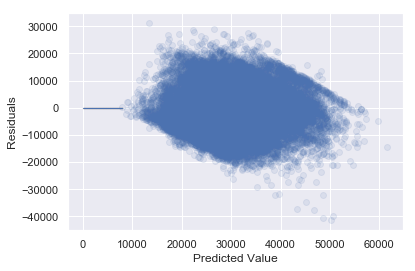

In [19]:
# residuals plot looks pretty good and symmetric about 0, looks like there's probably a linear relationship between features and target 
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,8000,1000),np.linspace(0,0,1000), linestyle='', marker='o', markersize=0.03)

plt.xlabel('Predicted Value')
plt.ylabel('Residuals')


- let's lay out all our different kinds of models 

In [20]:
# Linear 
lm = LinearRegression()


#Ridge
#feature scaling for train, val, test sets for ridge
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train,y_train)
X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)

lm_reg=Ridge(alpha=1)


#Lasso - looks ok on validation but awful on test 

X_train_scaled=scaler.fit_transform(X_train,y_train)
X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)

lm_lasso=Lasso(alpha=1)


#Polynomial 
#feature transforms for train, val, test sets for poly 
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Thi

- Look at cross validation 

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
print(cross_val_score(lm, X, y, cv=kf, scoring='r2'))

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
print(cross_val_score(lm_poly, X, y, cv=kf, scoring='r2'))

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
print(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2'))

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
print(cross_val_score(lm_lasso, X, y, cv=kf, scoring='r2'))

# they all have a very similar mean cv score

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_poly, X, y, cv=kf, scoring='r2')))


[0.42761004 0.42946208 0.4269472  0.42741018 0.41635971]
[0.42761004 0.42946208 0.4269472  0.42741018 0.41635971]
[0.42763136 0.42947175 0.42693454 0.42741627 0.4163381 ]
[0.42769797 0.4294837  0.42687773 0.42744493 0.41625983]
0.4255578416877045
0.42555840357323893
0.4255578416877045


In [22]:
# #Ridge
# # perform 5-fold cross-validation
# rcv = RidgeCV(cv=5)
# #train and score 
# rcv.fit(X_train, y_train)
# train_score_ridge = rcv.score(X_train, y_train)
# test_score_ridge = rcv.score(X_test, y_test)
# print (train_score_ridge,test_score_ridge)



# #Lasso
# #perform 5-fold cross-val, and train the model using training dataset
# lcv = LassoCV(cv=5, random_state=0)

# #train and score
# lcv.fit(X_train, y_train)
# train_score_lasso = lcv.score(X_train, y_train)
# test_score_lasso = lcv.score(X_test, y_test)
# print (train_score_lasso, test_score_lasso)


# #ElasticNet
# from sklearn.linear_model import ElasticNet
# elasticNet = ElasticNet(random_state=0).fit(X_train, y_train)
# train_score_elastic = elasticNet.score(X_train, y_train)
# test_score_elastic = elasticNet.score(X_test, y_test)
# print (train_score_elastic,test_score_elastic)

In [23]:
# validate on the regular linear regression, ridge, lasso and poly(d2) models

lm.fit(X_train, y_train)
print('Linear Regression val R^2: %.3f', lm.score(X_val, y_val))

lm_reg.fit(X_train_scaled, y_train)
print('Ridge Regression val R^2: %.3f', lm_reg.score(X_val_scaled, y_val))

lm_lasso.fit(X_train_scaled, y_train)
print('Lasso Regression val R^2: %.3f', lm_lasso.score(X_val_scaled, y_val))

lm_poly.fit(X_train_poly, y_train)
print('Degree 2 polynomial regression val R^2: %.3f', lm_poly.score(X_val_poly, y_val))


Linear Regression val R^2: %.3f 0.42482763451884964
Ridge Regression val R^2: %.3f 0.4248275759809152
Lasso Regression val R^2: %.3f 0.4248222419112949
Degree 2 polynomial regression val R^2: %.3f 0.5176942078922773


In [24]:
# degree 2 looks best let's run test set on it. 
lm_poly.fit(X,y)
print('Linear Regression test R^2: %.3f', lm_poly.score(X_test, y_test))

Linear Regression test R^2: %.3f 0.41484574865834345


In [25]:
print(lm.intercept_)
print(lm.coef_)

-86579.41213712245
[-3.60172545e+02  1.72759507e+02 -3.11777104e+01 -3.74019256e+02
  1.13553675e+04  2.15766026e+03  2.70206556e+03  7.83387524e+02
  3.09144985e-01  2.05289896e+03  1.58565807e+03  2.40477715e+02
 -1.76520353e+01 -1.54190159e+01 -1.37649853e+02 -9.15293821e+02]


In [26]:
def SSE(actuals, y_pred):
    return np.sum((actuals - y_pred)**2)

SSE(y,y_pred)

2216391398737.411

In [27]:
# sns.jointplot('bat_age', 'attendance', data=master_df.sample(frac=0.009), kind='reg')


In [28]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, y_pred):
    return np.sqrt(mean_squared_error(actual,y_pred))

RMSE(y,y_pred)

8052.38429476971

- look at interactions between features to see if it improves r^2. it does a little bit but not significantly enough 

In [29]:
from sklearn.preprocessing import PolynomialFeatures

interactions = PolynomialFeatures(degree=2, interaction_only=True)

lm.fit(interactions.fit_transform(X_train), y_train)
print('OLS regression with interaction terms val R^2: %.3f' % lm.score(interactions.transform(X_val), y_val))
print('OLS regression with interaction terms val RMSE: %.3f' 
      % RMSE(lm.predict(interactions.fit_transform(X_val)), y_val))

OLS regression with interaction terms val R^2: 0.481
OLS regression with interaction terms val RMSE: 7595.330


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=55)

lm = LinearRegression()
lm.fit(X_train, y_train)
print('OLS regression score val R^2: %.3f' % lm.score(X_val, y_val))
print('OLS regression score val RMSE: %.3f \n' % (RMSE(lm.predict(X_val), y_val)))

lm_poly.fit(X_train_poly,y_train)
print('Degree 2 polynomial regression val R^2: %.3f' % lm_poly.score(X_val_poly, y_val))
print('Degree 2 polynomial regression score val RMSE: %.3f \n' % RMSE(lm_poly.predict(X_val_poly), y_val))

OLS regression score val R^2: 0.407
OLS regression score val RMSE: 8125.942 

Degree 2 polynomial regression val R^2: -0.006
Degree 2 polynomial regression score val RMSE: 10583.720 



## Trying Tree Methods

In [287]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)
rf.score(X_test,y_test)

0.752909168891807

In [288]:
RMSE(rf.predict(X_val),y_val)
RMSE(rf.predict(X_test),y_test)


5272.140875305214

In [33]:
gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.6771032055785027

In [34]:
RMSE(gbm.predict(X_val),y_val)


5995.552252558666

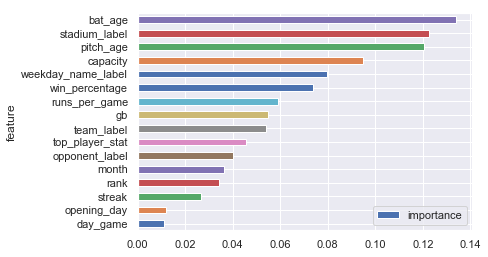

In [37]:
feat_imps = list(zip(X_train.columns,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

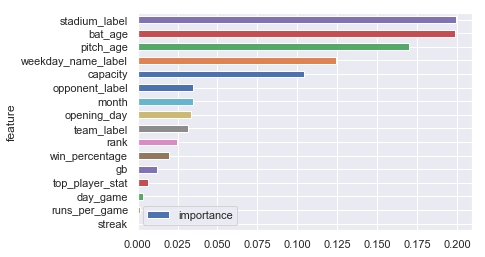

In [38]:
feat_imps = list(zip(X_train.columns,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

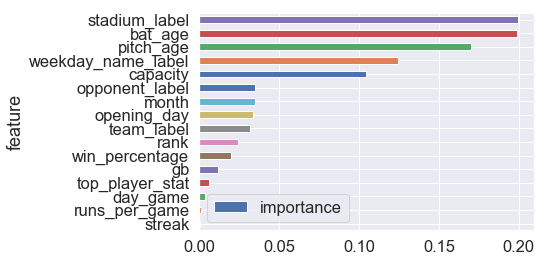

In [289]:
feat_imps = list(zip(X_test.columns,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')